# Question 5

#### Importing some libraries

In [3]:
## Econ 240 A
## Problem set 2
## Problem 5

# Importing libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs
from scipy.optimize import minimize_scalar

#### Defining Some Parameters

In [4]:
# Parameters
Ns = 1000;
N = 1000;
sigma = 1/2.0;
K = 20;

#### Defining some functions

In [5]:
# defining the m_b and m_s of (x)
def m_b (x):
    return 0.5*scs.norm.pdf(x,0.4,12) + 0.5*scs.norm.pdf(x,0.7,0.08);

def m_s(x):
    return 0.6*((x>=0) & (x<1./3)) + 0.9*((x>=1.0/3) & (x<3.0/4)) + 204/120.*((x>3.0/4) & (x<=1));

# defining basis function of phi_k(x) as
# phi_0(x) = 1
# phi_k(x) = sqrt(2) cos (pi k*x)
# note that here k=0,1,... K-1
def phi(x,k):
    if k == 0:
        return np.ones(len(x));
    else:
        return np.sqrt(2)*np.cos(np.pi*k*x);
    
# def PHI(X) as a matrix of NxK where it is defined as 
# PHI(X) = [phi_1(x_1)  phi_2(X_1) ... phi_k(X_1)]
#          [phi_1(x_2)  phi_2(X_2) ... phi_k(X_2)]
#          [phi_1(x_3)  phi_2(X_3) ... phi_k(X_3)]
#          [...         ...        ... ...       ]
#          [phi_1(x_N)  phi_2(X_N) ... phi_k(X_N)]
def PHI(x):
    result = np.zeros((len(x),K))
    for k in range(0,K):
        result[:,k] = phi(x,k);
    return result;
    
# calculating the MLE of m
# for an input of x
# and coefficients z
def MLE(x,z):
    return np.sum(PHI(x)*z,1)

# Calculating Efromovich estimate of m
# for input of x 
# and coefficients z
def EF(x,z):
    c_hat = np.maximum(1-sigma**2/z**2/N,0);
    return np.sum(c_hat*PHI(x)*z,1);
    

## Part a

In [6]:
# Solving for Part (a)

x = np.arange(1./(N+1),1.,1./(N+1));

# True values for bimodal and steps test function m_b and m_s 
M_b = m_b(x);
M_s = m_s(x);

# Creating matrixes for storing all sample results
Y_b_all = np.zeros((N,Ns))
Y_s_all = np.zeros((N,Ns))

MLE_b_all = np.zeros((N,Ns))
MLE_s_all = np.zeros((N,Ns))

EF_b_all = np.zeros((N,Ns))
EF_s_all = np.zeros((N,Ns))

SEL_MLE_b_all = np.empty(Ns)
SEL_MLE_s_all = np.empty(Ns)

SEL_EF_b_all = np.empty(Ns)
SEL_EF_s_all = np.empty(Ns)



for n in range(0, Ns): # change 1 to Ns
    
    # Generating Y for m_b and m_s
    U = sigma*np.random.randn(N);
    Y_b = M_b + U;
    Y_s = M_s + U;
    
    # We repeat the vectors Y_b on K rows
    # therefore the size is KxN
    Y_b_matrix = np.ones((K,1))*Y_b; 
    Y_s_matrix = np.ones((K,1))*Y_s;
    
    # Finding Z 
    Z_b = np.sum(PHI(x)*Y_b_matrix.T,0)/N;
    Z_s = np.sum(PHI(x)*Y_s_matrix.T,0)/N;
    
    MLE_b = MLE(x, Z_b)
    MLE_s = MLE(x, Z_s)
    EF_b = EF(x,Z_b)
    EF_s = EF(x, Z_s)
    
    
    # computing the average squared error loss(SEL)
    SEL_MLE_b = np.mean((M_b - MLE_b)**2)
    SEL_MLE_s = np.mean((M_s - MLE_s)**2)
    SEL_EF_b = np.mean((M_b - EF_b)**2)
    SEL_EF_s = np.mean((M_s - EF_s)**2)

    # Storing all the results
    Y_b_all[:,n] = Y_b 
    Y_s_all[:,n] = Y_s

    MLE_b_all[:,n] = MLE_b
    MLE_s_all[:,n] = MLE_s

    EF_b_all[:,n] = EF_b
    EF_s_all[:,n] = EF_s

    
    SEL_MLE_b_all[n] = SEL_MLE_b
    SEL_MLE_s_all[n] = SEL_MLE_s

    SEL_EF_b_all[n] = SEL_EF_b
    SEL_EF_s_all[n] = SEL_EF_s

    
    


## Part b

Different Quantiles of Squared Average loss for Bimodal
      Efromovich       MLE
0.25    0.002790  0.003925
0.50    0.003568  0.004873
0.75    0.004621  0.006011
Different Quantiles of Squared Average loss for Steps
      Efromovich       MLE
0.25    0.007610  0.007618
0.50    0.008496  0.008525
0.75    0.009537  0.009740


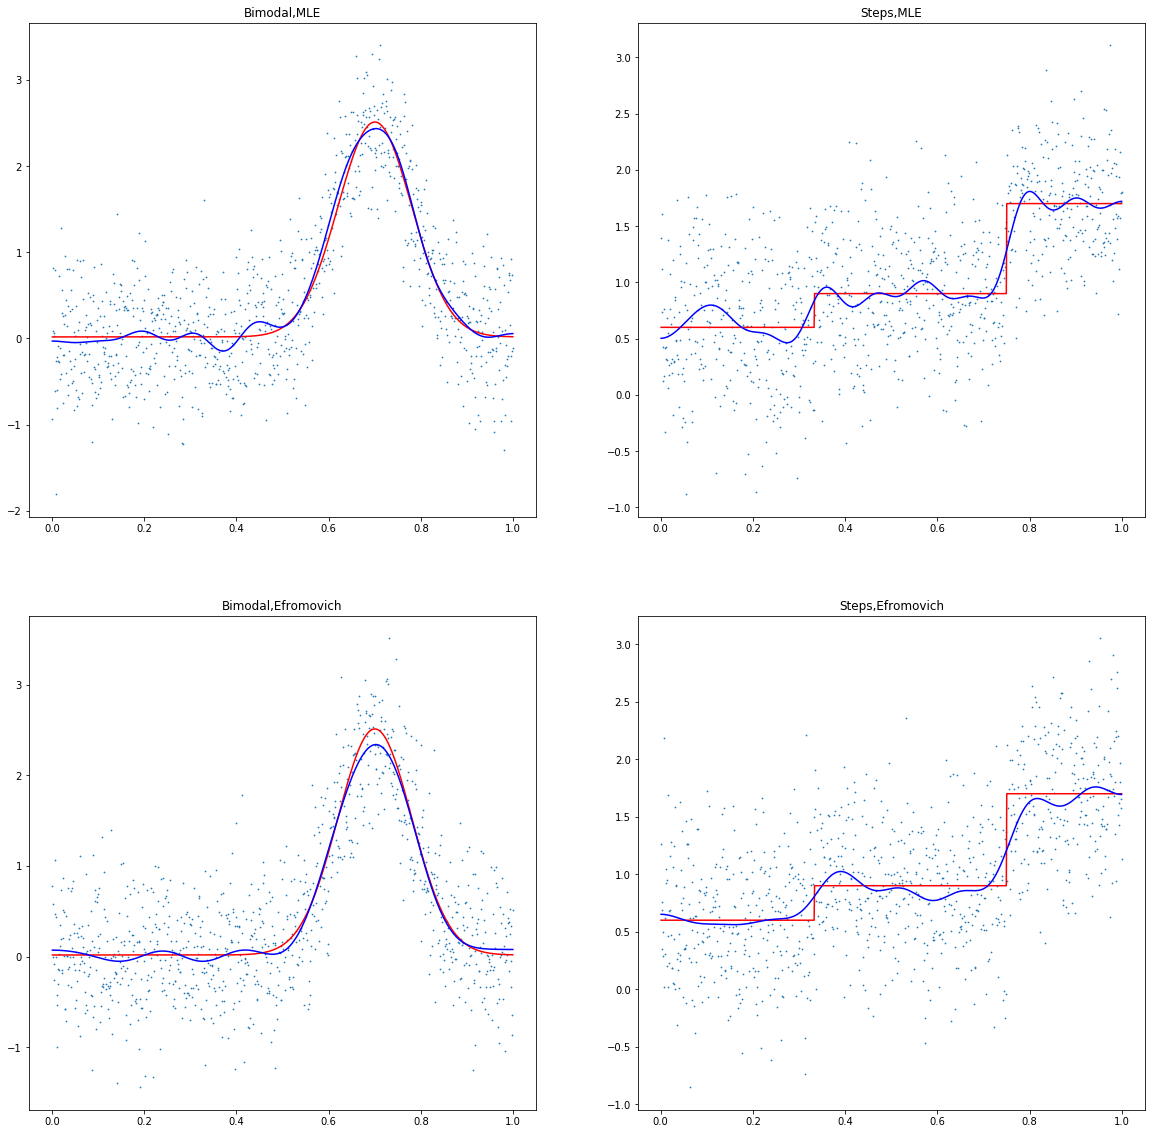

In [7]:
# solving for part (b)

# Finding the average loss across 1000 samples
ave_SEL_MLE_b_all = np.median(SEL_MLE_b_all);
ave_SEL_MLE_s_all = np.median(SEL_MLE_s_all)
ave_SEL_EF_b_all = np.median(SEL_EF_b_all)
ave_SEL_EF_s_all = np.median(SEL_EF_s_all)


# Finding the median loss for each sample
med_SEL_MLE_b_all = np.median(SEL_MLE_b_all);
med_SEL_MLE_s_all = np.median(SEL_MLE_s_all)
med_SEL_EF_b_all = np.median(SEL_EF_b_all)
med_SEL_EF_s_all = np.median(SEL_EF_s_all)

# Now we need to keep the sample that corresponds to median loss
# for this we first need to find the index of the sample
# that corresponds to the median loss
indx_MLE_b = np.abs(med_SEL_MLE_b_all - SEL_MLE_b_all).argmin();
indx_MLE_s = np.abs(med_SEL_MLE_s_all- SEL_MLE_s_all).argmin()
indx_EF_b = np.abs(med_SEL_EF_b_all - SEL_EF_b_all).argmin()
indx_EF_s = np.abs(med_SEL_EF_s_all - SEL_EF_s_all).argmin()

Y_MLE_b_median = Y_b_all[:,indx_MLE_b]
Y_MLE_s_median = Y_s_all[:,indx_MLE_s]
Y_EF_b_median = Y_b_all[:,indx_EF_b]
Y_EF_s_median = Y_s_all[:,indx_EF_s]

MLE_b_median = MLE_b_all[:,indx_MLE_b]
MLE_s_median = MLE_s_all[:,indx_MLE_s]
EF_b_median = EF_b_all[:,indx_EF_b]
EF_s_median = EF_s_all[:,indx_EF_s]

# Creating a table and reporting the result
table_b = pd.DataFrame({"MLE":SEL_MLE_b_all, "Efromovich":SEL_EF_b_all})
table_s = pd.DataFrame({"MLE":SEL_MLE_s_all, "Efromovich":SEL_EF_s_all})
# Printing the table
print ("Different Quantiles of Squared Average loss for Bimodal")
print (table_b.quantile(q=[0.25,0.5,0.75]))

print('Different Quantiles of Squared Average loss for Steps')
print(table_s.quantile(q=[0.25,0.5,0.75]))

plt.figure(figsize=(20,20))


h1=plt.subplot(2,2,1)
h1.set_title('Bimodal,MLE')
plt.plot(x,M_b,'r')
plt.plot(x,MLE_b_median,'b')
plt.scatter(x,Y_MLE_b_median,s=0.5)

h1=plt.subplot(2,2,2)
h1.set_title('Steps,MLE')
plt.plot(x,M_s,'r')
plt.plot(x,MLE_s_median,'b')
plt.scatter(x,Y_MLE_s_median,s=0.5)

h1=plt.subplot(2,2,3)
h1.set_title('Bimodal,Efromovich')
plt.plot(x,M_b,'r')
plt.plot(x,EF_b_median,'b')
plt.scatter(x,Y_EF_b_median,s=0.5)

h1=plt.subplot(2,2,4)
h1.set_title('Steps,Efromovich')
plt.plot(x,M_s,'r')
plt.plot(x,EF_s_median,'b')
plt.scatter(x,Y_EF_s_median,s=0.5)



plt.show()

## Part c

Different Quantiles of Squared Average loss for Bimodal and Steps in the Soft Threshhold Case
      ST Bimodal  ST Steps
0.25    0.003768  0.007466
0.50    0.004782  0.008394
0.75    0.005964  0.009571


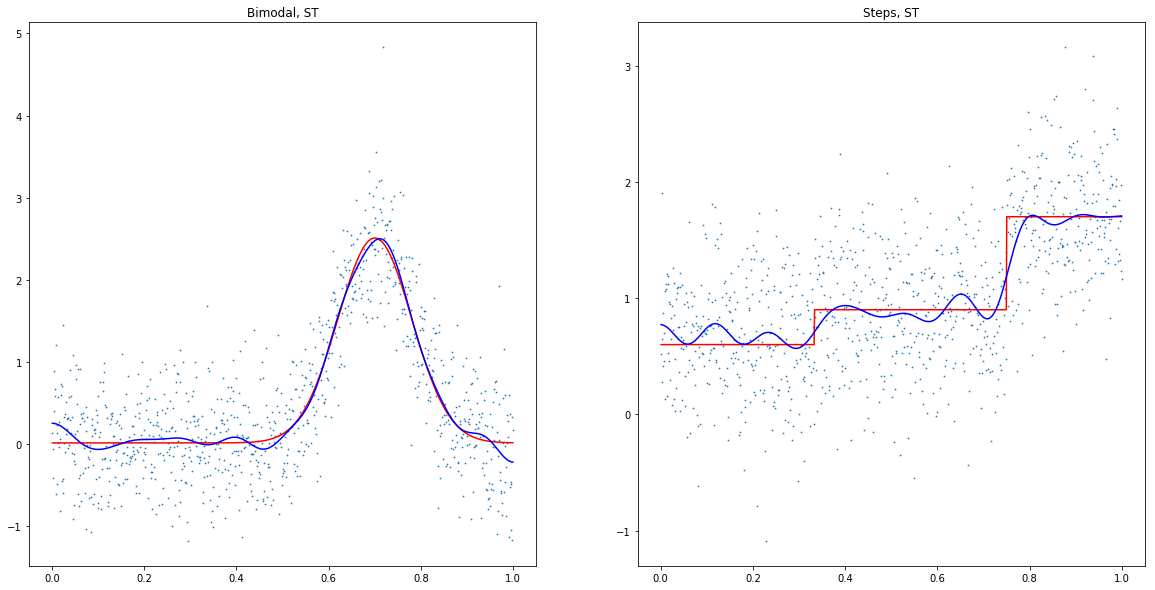

In [11]:
# Part c
# Here we need to redo the whole problem again
# but this time using soft-threshhold of m
# finding lambda to minimize the SURE expression

# Using Problem 3, we define \hat{R}_SURE 
# where z is the input vector Kx1
# and l is lambda
# the output will be a scalar
# since k\sigma^2/N is just a constant number
# and has no effect in minization
# we do not write it here
def sure(z,l):
    indicator = np.abs(z) <= l;
    minimum = np.minimum(z**2, l**2)
    return -2*sigma**2/N*np.sum(indicator) + np.sum(minimum);

# Using problem 3, again we define the soft threshhold function
# we insert x and z and l
# output is an array of length N
# with \hat{θ} replaced instead of \th
def soft_threshhold(x, z, l):
    hat_theta = np.sign(z)*np.maximum(np.abs(z)-l,0);
    return np.sum(PHI(x)*hat_theta,1);


# storing all the data
st_b_all = np.zeros((N,Ns))
st_s_all = np.zeros((N,Ns))
SEL_st_b_all = np.empty(Ns)
SEL_st_s_all = np.empty(Ns)


for n in range(0,Ns):
    # restoring the data
    Y_b = Y_b_all[:,n]   
    Y_s = Y_s_all[:,n]
    
    # We repeat the vectors Y_b on K rows
    # therefore the size is KxN
    Y_b_matrix = np.ones((K,1))*Y_b; 
    Y_s_matrix = np.ones((K,1))*Y_s;
    
    # Finding Z 
    Z_b = np.sum(PHI(x)*Y_b_matrix.T,0)/N;
    Z_s = np.sum(PHI(x)*Y_s_matrix.T,0)/N;
    
    # Now we define a function for l
    sure_b = lambda l: sure(Z_b, l);
    sure_s = lambda l: sure(Z_s, l);
    
    # minimizing lambda
    l_b_minimized = minimize_scalar(sure_b).x
    l_s_minimized = minimize_scalar(sure_s).x
    
    # compute soft Threshholds
    st_b = soft_threshhold(x,Z_b,l_b_minimized)
    st_s = soft_threshhold(x,Z_s,l_s_minimized)
    
    # computing the average squared error loss(SEL)
    SEL_st_b = np.mean((M_b - st_b)**2)
    SEL_st_s = np.mean((M_s - st_s)**2)
    
    st_b_all[:,n] = st_b
    st_s_all[:,n] = st_s
    
    SEL_st_b_all[n] = SEL_st_b
    SEL_st_s_all[n] = SEL_st_s
    
# Finding the average loss across 1000 samples
ave_SEL_st_b_all = np.median(SEL_st_b_all);
ave_SEL_st_s_all = np.median(SEL_st_s_all)
# Finding the median loss for each sample
med_SEL_st_b_all = np.median(SEL_st_b_all);
med_SEL_st_s_all = np.median(SEL_st_s_all)
# Finding the index of the sample that matches median
indx_st_b = np.abs(med_SEL_st_b_all - SEL_st_b_all).argmin();
indx_st_s = np.abs(med_SEL_st_s_all- SEL_st_s_all).argmin()
# The sample that matches median
Y_st_b_median = Y_b_all[:,indx_st_b]
Y_st_s_median = Y_s_all[:,indx_st_s]
# Finding the results of the median
st_b_median = st_b_all[:,indx_st_b]
st_s_median = st_s_all[:,indx_st_s]


# Creating a table and reporting the result
table_b_st = pd.DataFrame({"ST Bimodal":SEL_st_b_all, "ST Steps":SEL_st_s_all })
# Printing the table
print ("Different Quantiles of Squared Average loss for Bimodal and Steps in the Soft Threshhold Case")
print (table_b_st.quantile(q=[0.25,0.5,0.75]))


plt.figure(figsize=(20,10))


h1=plt.subplot(1,2,1)
h1.set_title('Bimodal, ST')
plt.plot(x,M_b,'r')
plt.plot(x,st_b_median,'b')
plt.scatter(x,Y_st_b_median,s=0.5)

h1=plt.subplot(1,2,2)
h1.set_title('Steps, ST')
plt.plot(x,M_s,'r')
plt.plot(x,st_s_median,'b')
plt.scatter(x,Y_st_s_median,s=0.5)
plt.show()